Zadanie 1

In [1]:
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode (generic function with 3 methods)

In [11]:
decode(Float32(1/3))

('0', "01111101", "01010101010101010101011")

In [14]:
decode(Float16(1/3))

('0', "01101", "0101010101")

In [16]:
decode(Float64(1/3))

('0', "01111111101", "0101010101010101010101010101010101010101010101010101")

In [26]:
decode(Float64(Float16(1/3)))

('0', "01111111101", "0101010101000000000000000000000000000000000000000000")

Dla kazdej reprezentacji schemat jest ten sam, cecha -2 i mantysa mieszczaca tak dlugi okres jak to mozliwe, przy rzutowaniu
okres zostaje tak dlugi jak to bylo mozliwe dla mniejszej dokladnosci

Zadanie 2

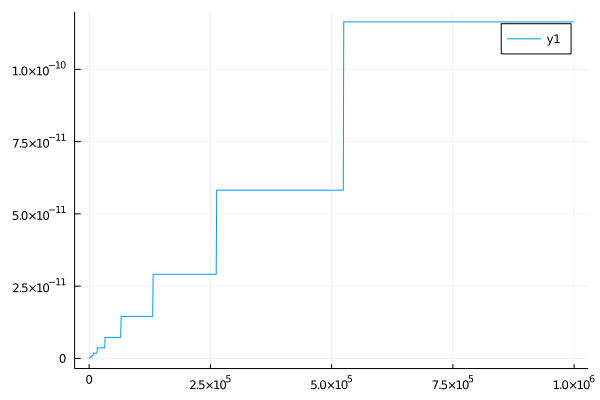

In [1]:
using Plots
x = 1:1000:1000000
y = [eps(Float64(i)) for i=1:1000:1000000]
plot(x,y)

Zadanie 3

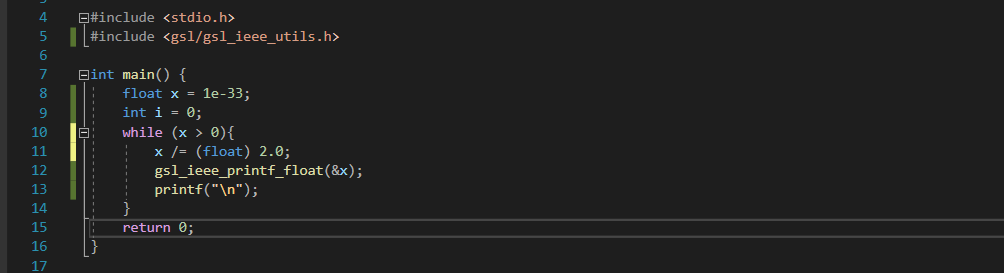

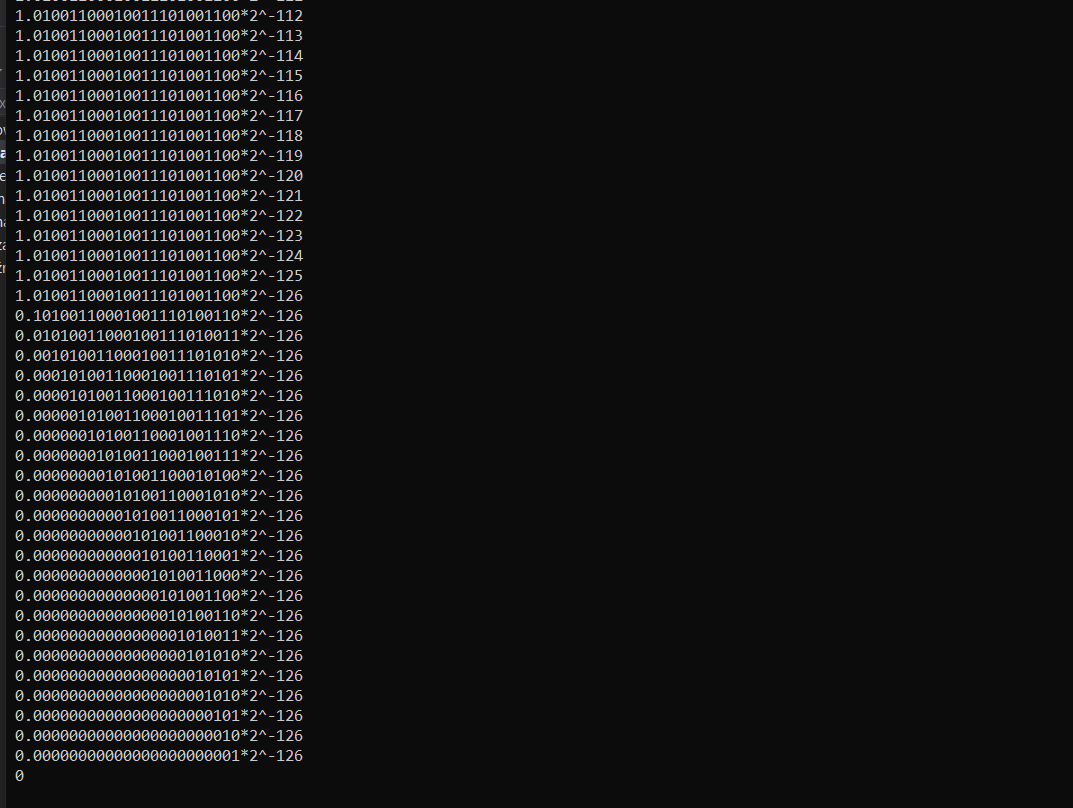

Do kiedy jest to mozliwe zmiejszana jest jedynie cecha co wynika z tego ze w tym przypadku dzielimy przez 2. Kiedy jednak cecha staje sie samymi zerami i przyjmuje najmniejsza mozliwa watosc liczba traci swoja 1 na poczatku mantysy i mantysa wlasnie jest zmiejszana do puki ona sama nie jest wyzerowana.

Zadanie 4

In [9]:
function ciag(x::Int64)
    if x==0
        return 1
    elseif x==1
        return 1/3
    else
        return (13/3)*ciag(x-1) - (4/3)*ciag(x-2)
    end
end
        
        

ciag (generic function with 1 method)

In [23]:
print(ciag(20))

-1.361158544307069e-5

ciag(20) przyjmuje wartosc ujemna co nie jest mozliwe, wiec algorytm dziala blednie
wielokrotne odejmowanie i przemnarzanie liczb przemnozonych przez wielokrotnosc 1/3 prowadzi do pogłebiajacej sie utraty precyzji
można temu zapobiec sprowadzajac postac rekurencyjna tego rownania do postaci jawnej (1/3)^n.
Jeszcze wieksza precyzje mozna uzyskac jesli przy korzystaniu ze wzoru jawnego potegi bedziemy obliczac mianownik przy uzyciu inta, wtedy pozbymy sie poglebiajacych sie niedokladnosci wynikajacej z ciaglego mnozenia przez siebie 1/3 
Sprawdzmy jak zmienia sie odległość wyniku podawanego przez funkcje ciag() w porownaniu do obliczen ze wzoru jawnego

In [24]:
b = Int32(3)
for i in 1:20
    print("i = ", i ,"; diff = ", ciag(i) - 1/(b^i), "\n")
end

i = 1; diff = 0.0
i = 2; diff = -1.6653345369377348e-16
i = 3; diff = -7.771561172376096e-16
i = 4; diff = -3.164135620181696e-15
i = 5; diff = -1.267562443896253e-14
i = 6; diff = -5.070748508584355e-14
i = 7; diff = -2.0283248821847955e-13
i = 8; diff = -8.113307389204932e-13
i = 9; diff = -3.245323213179989e-12
i = 10; diff = -1.2981292947587646e-11
i = 11; diff = -5.192517181322047e-11
i = 12; diff = -2.077006872594464e-10
i = 13; diff = -8.308027490396914e-10
i = 14; diff = -3.3232109961595332e-9
i = 15; diff = -1.3292843984638424e-8
i = 16; diff = -5.317137593855379e-8
i = 17; diff = -2.126855037542152e-7
i = 18; diff = -8.507420150168607e-7
i = 19; diff = -3.4029680600674425e-6
i = 20; diff = -1.3610348099387487e-5
